In [1]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

plt.style.use('dark_background')

In [ ]:
# Función para graficar
def plot_graphs(history, string):
  plt.plot(history.history[string], color='blue')
  plt.plot(history.history['val_'+string], color='red')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Dataset que vamos a utilizar es el de los Vinos

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/ThoMiranda/IA-2023/dataset/wine.csv')
dataset_cop=dataset.copy() #realizamos una copia del dataset original

Busco el Target y busco encodearlo

In [3]:
dataset['type'].unique()

array(['red', 'white'], dtype=object)

In [7]:
le=LabelEncoder()
dataset['type']=le.fit_transform(dataset['type'])
dataset_cop.drop('type',axis=1,inplace=True)

In [8]:
print(dataset['type'].unique())
dataset_cop.head()

[0 1]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


MinMaxScaler()

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [14]:
scalar = MinMaxScaler()
dataset_cop=scalar.fit_transform(dataset_cop)
print(dataset_cop.shape)

(6497, 12)


In [84]:
dataset_cop.shape

(6497, 12)

# Modelo 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset_cop, dataset['type'], test_size=0.2, random_state=8)

Entreno el modelo con: 

- Primero con la capa input de 12 features (input_shape=(12,))
- Capa oculta de 64 neuronas con activación relu
- Segunda capa oculta de 16 neuronas con activación relu
- Capa de salida de 2 neuronas con activación softmax

In [25]:
model = tf.keras.models.Sequential([
    # Densa de 64 neuronas 
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(12,)), #cada de entrada de 12 neuronas con una
    # Capa de Dropout para evitar overfitting. Elimina el 30% de las neuronas de forma aleatoria.
    tf.keras.layers.Dropout(0.3),
    # Densa de 16 neuronas
    tf.keras.layers.Dense(16, activation='sigmoid'),
    # 2 Clases de salida: White y Red
    tf.keras.layers.Dense(2, activation='sigmoid') 
])

* Sigmoid: Especialmente útil en la capa de salida para problemas de clasificación binaria, ya que puede interpretarse como la probabilidad de pertenecer a una clase.

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                832       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 16)                1040      
                                                                 
 dense_12 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1906 (7.45 KB)
Trainable params: 1906 (7.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Número total de parametros proviene de:

In [22]:
print((12*64+64)+(64*16+16)+(16*2+2))

1906


In [27]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train,epochs = 30, 
                    validation_data = (X_test, y_test), 
                    )

Epoch 1/30
163/163 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.7229 - val_loss: 0.5688 - val_accuracy: 0.7408
Epoch 2/30
163/163 [==============================] - 0s 654us/step - loss: 0.5410 - accuracy: 0.7572 - val_loss: 0.5420 - val_accuracy: 0.7408
Epoch 3/30
163/163 [==============================] - 0s 631us/step - loss: 0.5093 - accuracy: 0.7572 - val_loss: 0.4860 - val_accuracy: 0.7408
Epoch 4/30
163/163 [==============================] - 0s 645us/step - loss: 0.4295 - accuracy: 0.7868 - val_loss: 0.3581 - val_accuracy: 0.7738
Epoch 5/30
163/163 [==============================] - 0s 635us/step - loss: 0.3054 - accuracy: 0.8847 - val_loss: 0.2067 - val_accuracy: 0.9569
Epoch 6/30
163/163 [==============================] - 0s 645us/step - loss: 0.1966 - accuracy: 0.9411 - val_loss: 0.1291 - val_accuracy: 0.9723
Epoch 7/30
163/163 [==============================] - 0s 684us/step - loss: 0.1466 - accuracy: 0.9571 - val_loss: 0.0952 - val_accuracy: 0

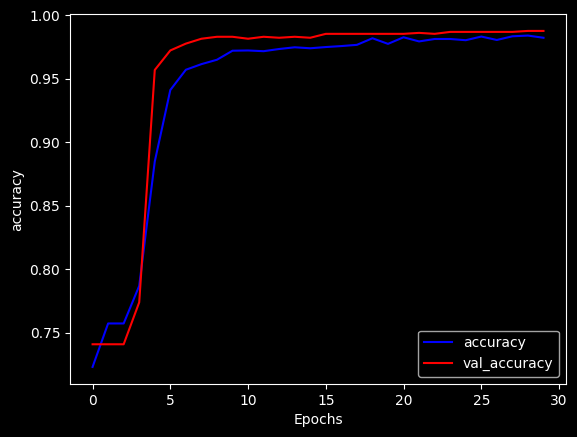

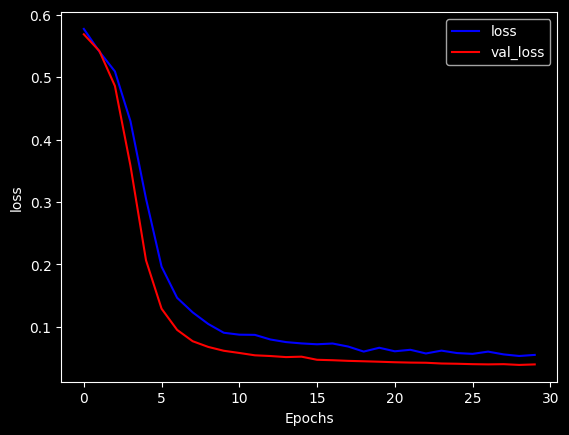

In [31]:
# Graficar curvas de loss y accuracy para datos de entrenamiento y validación
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [32]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

41/41 - 0s - loss: 0.0399 - accuracy: 0.9877 - 27ms/epoch - 651us/step

Test accuracy: 0.9876922965049744


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular los valores de precisión, recall y f1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=True)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir los resultados
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

41/41 [==============================] - 0s 353us/step
Precision: 0.99
Recall: 0.99
F1 score: 0.99


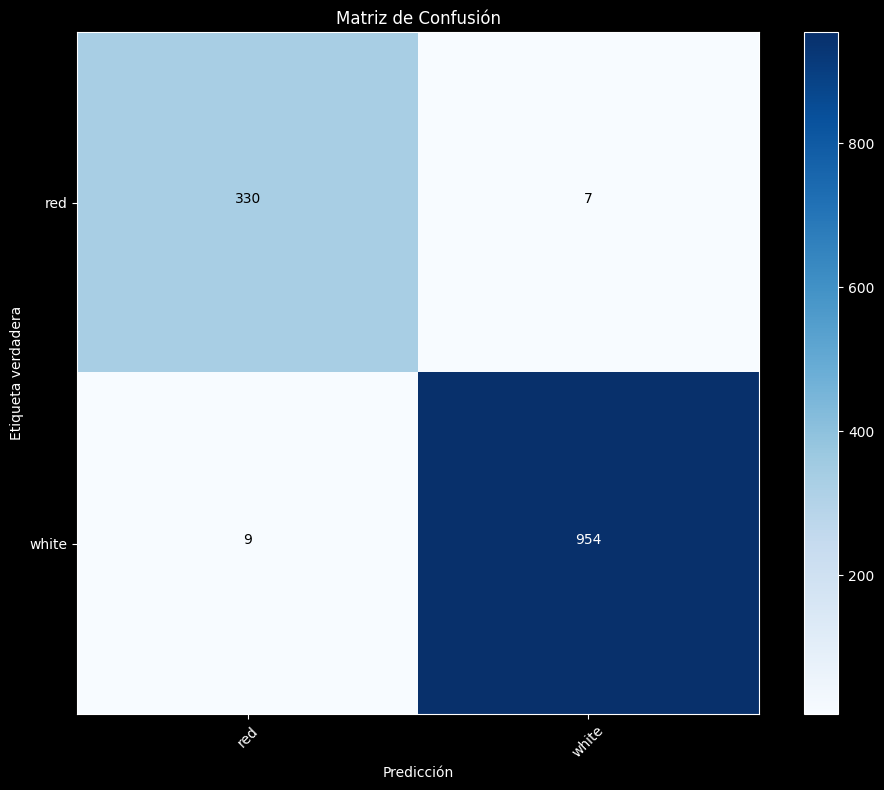

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
classes=['red', 'white']
# Obtener los índices de la clase con mayor probabilidad de cada muestra

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(10,8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


# Probando con otro dataset

## Todo referido al dataset de Creditos Bancarios

In [105]:
df=pd.read_csv('https://raw.githubusercontent.com/ThoMiranda/IA-2023/dataset/credit_customers.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [54]:
df_cop=df.copy() #realizamos una copia del dataset original

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [75]:
col=['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']
for i in df.columns:
    print(i,df[i].unique(),'\n')

checking_status ['<0' '0<=X<200' 'no checking' '>=200'] 

duration [ 6. 48. 12. 42. 24. 36. 30. 15.  9. 10.  7. 60. 18. 45. 11. 27.  8. 54.
 20. 14. 33. 21. 16.  4. 47. 13. 22. 39. 28.  5. 26. 72. 40.] 

credit_history ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid'] 

purpose ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining'] 

credit_amount [ 1169.  5951.  2096.  7882.  4870.  9055.  2835.  6948.  3059.  5234.
  1295.  4308.  1567.  1199.  1403.  1282.  2424.  8072. 12579.  3430.
  2134.  2647.  2241.  1804.  2069.  1374.   426.   409.  2415.  6836.
  1913.  4020.  5866.  1264.  1474.  4746.  6110.  2100.  1225.   458.
  2333.  1158.  6204.  6187.  6143.  1393.  2299.  1352.  7228.  2073.
  5965.  1262.  3378.  2225.   783.  6468.  9566.  1961.  6229.  1391.
  1537.  1953. 14421.  3181.  5190.  2171.  1007.  1819.  2394.  8133.
   730.  1164.  5954

In [84]:
for i in range(len(col)):
    df_cop[col[i]] = le.fit_transform(df_cop[col[i]])

# Now, all the categorical columns have been encoded with numerical values
df_cop.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,2,1,6,142,4,3,3,3,2,...,3,48,1,1,1,1,0,1,1,1
1,0,29,3,6,770,2,0,1,0,2,...,3,3,1,1,0,1,0,0,1,0
2,3,8,1,2,390,2,1,1,3,2,...,3,30,1,1,0,3,1,0,1,1
3,1,26,3,3,848,2,1,1,3,1,...,1,26,1,0,0,1,1,0,1,1
4,1,17,2,4,734,2,0,2,3,2,...,2,34,1,0,1,1,1,0,1,0


In [85]:
for i in df_cop.columns:
    print(i,df_cop[i].unique(),'\n')

checking_status [1 0 3 2] 

duration [ 2 29  8 26 17 23 21 11  5  6  3 31 13 27  7 19  4 30 14 10 22 15 12  0
 28  9 16 24 20  1 18 32 25] 

credit_history [1 3 2 4 0] 

purpose [6 2 3 4 9 0 1 7 5 8] 

credit_amount [142 770 390 848 734 869 533 813 562 747 190 700 287 149 232 183 464 852
 903 608 401 498 422 322 387 222  10   9 463 808 349 682 768 178 253 725
 776 391 163  15 447 138 781 779 777 230 434 213 821 388 772 177 598 419
  64 797 876 366 783 229 275 364 912 580 746 410 107 325 459 854  51 140
 771 370 270 674 726 875 657 769 157 288 315 438 235 904 425 128  24 233
  67 636 200 919 377 494 448 816 250 441  92 350 468 898 796 775 841 234
 246   8 784 846 307 629 820 399 698 454 329 663 317  63 352 396  44  28
 335 616 861 812 508 373 882 170 863  61 511 340  47 728 606 469 432 625
  74  37 752 293 211 767 842 814 187   3 618 345 538 118 825  85 550 132
 292 676 357  97  60 386 237 605 834 485   2 367  19 877 706 302 653  78
 216 742 143  36 588 713 659 669 393 559 261 226  98 5

## Modelo

In [203]:
X_train, X_test, y_train, y_test = train_test_split(df_cop.drop('class',axis=1,inplace=False)
                                                    , df_cop['class'], 
                                                    test_size=0.2, 
                                                    random_state=np.random.randint(0,1000))

In [174]:
model = tf.keras.models.Sequential([
    # Densa de 64 neuronas 
    tf.keras.layers.Dense(108, activation='sigmoid', input_shape=(20,)), #cada de entrada de 12 neuronas con una
    # Densa de 32 neuronas
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dropout(0.3),
    # 2 Clases de salida: Good y Bad
    tf.keras.layers.Dense(2, activation='sigmoid') 
])

Binary Crossentropy: 'binary_crossentropy' - Used for binary classification problems.

RMSprop: 'rmsprop' - An adaptive learning rate optimization algorithm that updates the learning rate for each parameter based on its recent gradients.

### Para el caso de binary_crossentropy (Particular)

In [148]:
from tensorflow.keras.utils import to_categorical
# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [155]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, epochs=99, validation_data=(X_test, y_test_encoded))

Epoch 1/99
25/25 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.7500 - val_loss: 0.5303 - val_accuracy: 0.7150
Epoch 2/99
25/25 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7613 - val_loss: 0.5211 - val_accuracy: 0.7400
Epoch 3/99
25/25 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.7688 - val_loss: 0.5224 - val_accuracy: 0.7200
Epoch 4/99
25/25 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7638 - val_loss: 0.5295 - val_accuracy: 0.7350
Epoch 5/99
25/25 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7450 - val_loss: 0.5202 - val_accuracy: 0.7250
Epoch 6/99
25/25 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7513 - val_loss: 0.5198 - val_accuracy: 0.7400
Epoch 7/99
25/25 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7500 - val_loss: 0.5347 - val_accuracy: 0.7150
Epoch 8/99
25/25 [==

No funciona en este caso el 'binary_crossentropy'

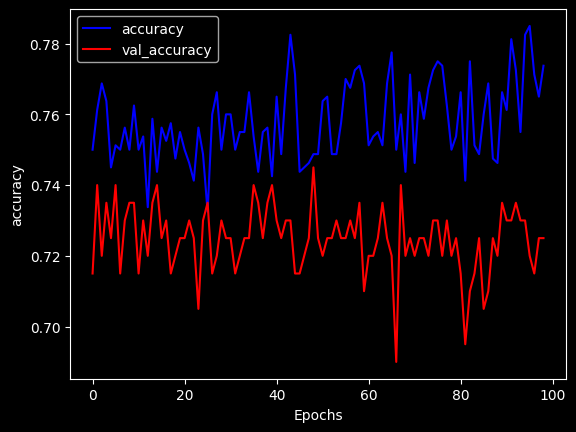

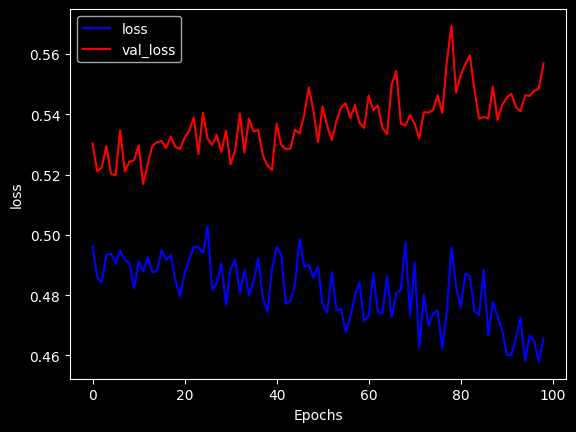

In [156]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [157]:
test_loss, test_acc = model.evaluate(X_test,  y_test_encoded, verbose=2)
print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 0.5569 - accuracy: 0.7250 - 15ms/epoch - 2ms/step

Test accuracy: 0.7250000238418579


### Para otros casos

In [206]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adagrad',  metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7475 - val_loss: 0.3882 - val_accuracy: 0.8200
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.7525 - val_loss: 0.3866 - val_accuracy: 0.8000
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.7613 - val_loss: 0.3888 - val_accuracy: 0.8050
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7575 - val_loss: 0.3882 - val_accuracy: 0.8050
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.7500 - val_loss: 0.3886 - val_accuracy: 0.8000
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7688 - val_loss: 0.3887 - val_accuracy: 0.8000
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7600 - val_loss: 0.3886 - val_accuracy: 0.8000
Epoch 8/100
2

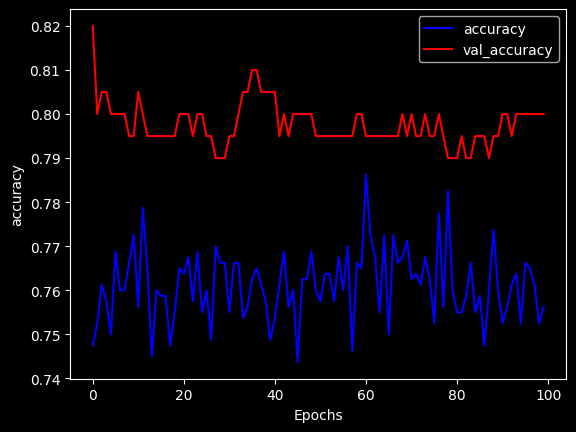

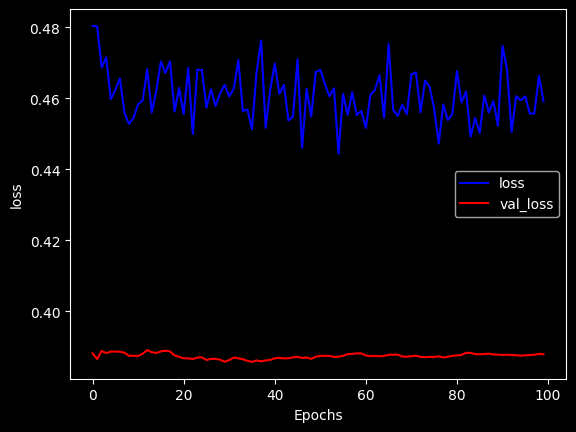

In [207]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')   

In [138]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular los valores de precisión, recall y f1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=True)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir los resultados
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

7/7 [==============================] - 0s 529us/step
Precision: 0.75
Recall: 0.77
F1 score: 0.76


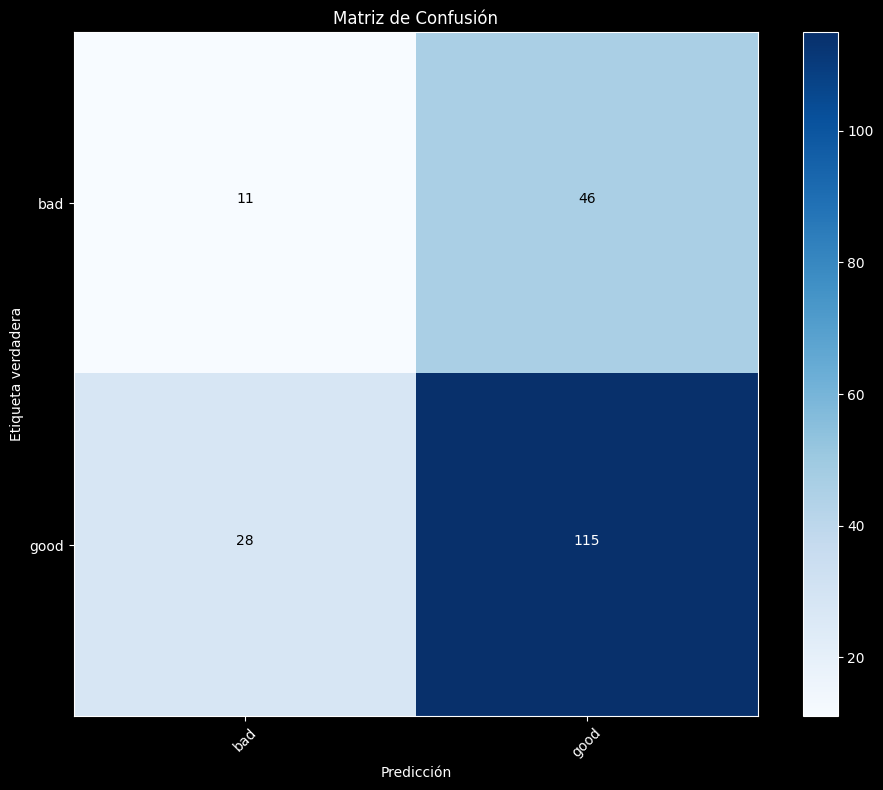

In [208]:
classes=['bad', 'good']
# Obtener los índices de la clase con mayor probabilidad de cada muestra

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(10,8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.show()